In [10]:
#imports
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

import numpy as np
import pandas as pd
import tensorflow as tf

In [11]:
# just to make sure everyone get's the same results
random_state = 20
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [12]:
# load training data
data = pd.read_csv('./regression_example_data.csv')

<AxesSubplot:title={'center':'Training data'}, xlabel='beer_cons', ylabel='fun'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
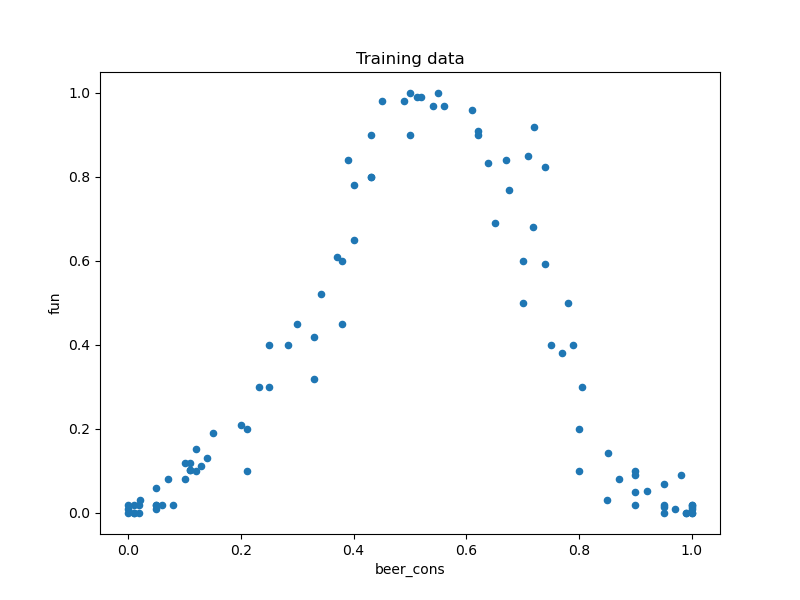

In [13]:
data.plot(kind='scatter', x='beer_cons', y='fun', title='Training data')

In [73]:
training_data = data.sample(frac=0.8)

validation_data = data.drop(training_data.index)

In [74]:
training_data

,beer_cons,fun
17,0.21,0.100
47,0.12,0.152
88,0.97,0.010
26,0.05,0.018
71,0.87,0.080
...,...,...
40,0.50,0.900
49,0.10,0.080
30,0.20,0.210
65,0.43,0.800


In [75]:
validation_data

,beer_cons,fun
2,0.900,0.020
9,0.050,0.010
14,0.920,0.052
23,0.080,0.020
25,0.020,0.020
27,0.021,0.030
31,0.700,0.500
39,0.232,0.300
41,0.950,0.070
50,0.110,0.102


In [15]:
# check len of data frames 
print(len(training_data))
print(len(validation_data))

78
20


In [16]:
# define model topology
inputs = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(2, name='HiddenLayer', activation=tf.keras.activations.tanh)(inputs)
output = tf.keras.layers.Dense(1, name='OutputLayer', activation = None)(x)

In [17]:
# create model
model = tf.keras.Model(inputs = inputs, outputs = output, name='BeerFunExample')

Model: "BeerFunExample"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 2)                 4         
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


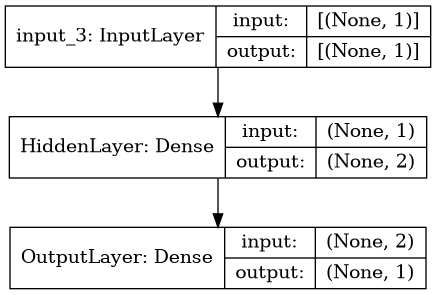

In [18]:
# inspect model
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
learning_rate = 0.1

model.compile(loss = tf.keras.losses.MeanSquaredError(),
             optimizer = tf.keras.optimizers.Adam(learning_rate),
             metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [24]:
history = model.fit(training_data['beer_cons'].to_numpy(), training_data['fun'].to_numpy(), batch_size=5, epochs=120, validation_data=(validation_data['beer_cons'].to_numpy(), validation_data['fun'].to_numpy()))

Epoch 1/120
16/16 [==============================] - 1s 21ms/step - loss: 0.1433 - root_mean_squared_error: 0.3780 - val_loss: 0.1236 - val_root_mean_squared_error: 0.3516
Epoch 2/120
16/16 [==============================] - ETA: 0s - loss: 0.1125 - root_mean_squared_error: 0.333 - 0s 11ms/step - loss: 0.1138 - root_mean_squared_error: 0.3360 - val_loss: 0.1074 - val_root_mean_squared_error: 0.3277
Epoch 3/120
16/16 [==============================] - 0s 13ms/step - loss: 0.1232 - root_mean_squared_error: 0.3507 - val_loss: 0.0965 - val_root_mean_squared_error: 0.3107
Epoch 4/120
16/16 [==============================] - 0s 16ms/step - loss: 0.1085 - root_mean_squared_error: 0.3290 - val_loss: 0.0903 - val_root_mean_squared_error: 0.3005
Epoch 5/120
16/16 [==============================] - 0s 11ms/step - loss: 0.0873 - root_mean_squared_error: 0.2951 - val_loss: 0.0972 - val_root_mean_squared_error: 0.3117
Epoch 6/120
16/16 [==============================] - 0s 17ms/step - loss: 0.1045 -

In [27]:
dummy_input_data = np.linspace(0, 1, 101)

In [29]:
y_pred = model.predict(dummy_input_data)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
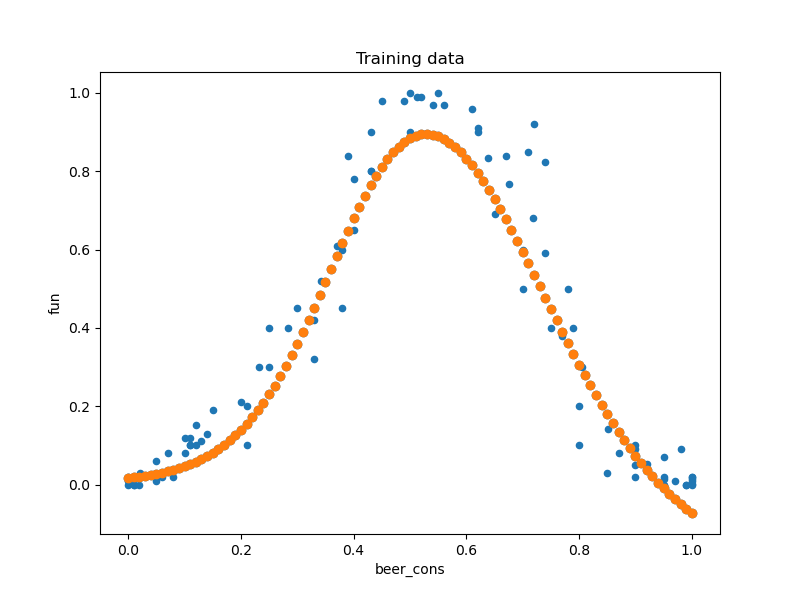

In [31]:
plt.scatter(dummy_input_data, y_pred)
plt.show()

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
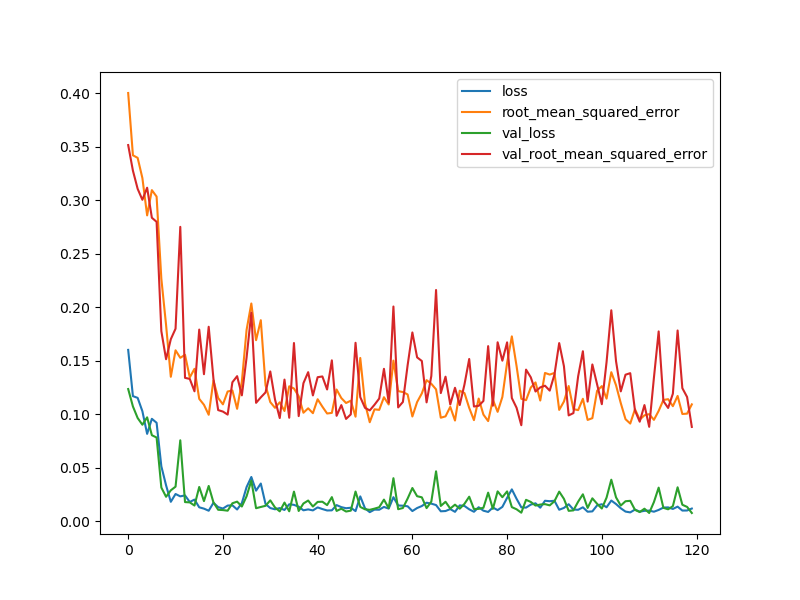

In [33]:
pd.DataFrame(history.history).plot()

In [39]:
layers = model.layers



In [46]:
for layer in layers:
    weights =layer.get_weights()
    
    if len(weights) == 0:
        continue

    weights_w = weights[0]
    weights_b = weights[1]
    
    print(f'Weights of {layer.name}: ')
    print(weights_w)
    print(f'Bias of {layer.name}: ')
    print(weights_b)
    print('')

Weights of HiddenLayer: 
[[5.753058  3.8749485]]
Bias of HiddenLayer: 
[-2.1655452 -2.7338123]

Weights of OutputLayer: 
[[ 0.72122806]
 [-0.8368679 ]]
Bias of OutputLayer: 
[-0.11074299]



In [63]:
hidden_layer_output = tf.keras.Model(inputs=inputs, outputs=model.layers[1].output)

In [64]:
output_layer_1 = hidden_layer_output.predict(dummy_input_data)

In [68]:
outputs_df = pd.DataFrame(output_layer_1)

[]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
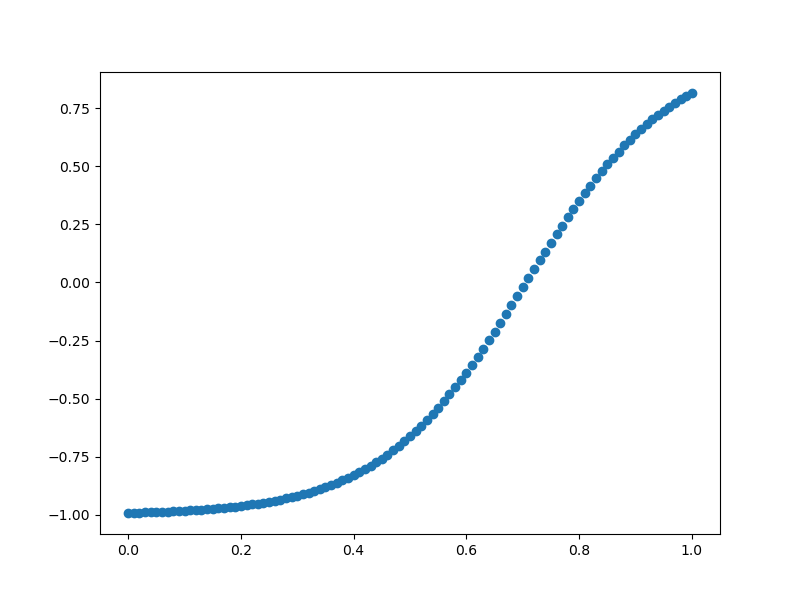

In [72]:
plt.close('all')
plt.scatter(dummy_input_data, outputs_df[1])
plt.plot()